# Titanic Dataset
En este notebook se hace uso del dataset de Titanic para estudiar el flujo de trabajo que se sigue en Machine Learning
- - -
### Importación de librerías
En primer lugar, se deben importar todas las librerías que se necesiten para realizar el estudio. En este caso, las librerías que se van a usar son:
- Pandas
- MatPlotLib
- Seaborn
- ipywidgets
- IPython
- scikit-learn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import ipywidgets as widgets
from IPython.display import display

### Carga del dataset
Lectura del archivo de datos (CSV, Excel, etc.) en un DataFrame de Pandas, creando la estructura principal sobre la que se trabajará. En este caso, se carga el dataset "Titanic"

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Exploración inicial
Análisis exploratorio de datos (EDA) básico: visualización de dimensiones, tipos de variables, estadísticas descriptivas, detección de valores nulos y outliers, para comprender la estructura y calidad inicial del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


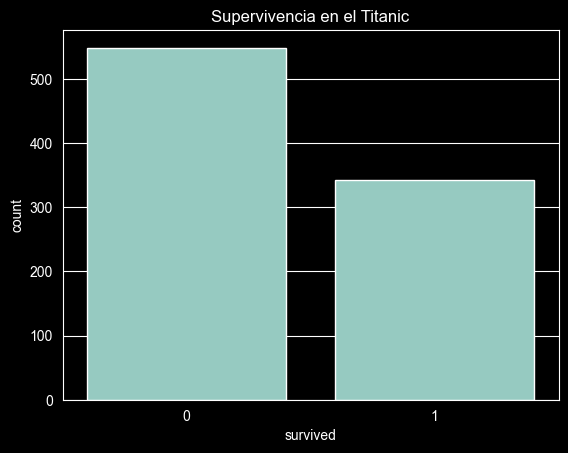

In [3]:
titanic.info()
titanic.describe(include='all')
sns.countplot(data=titanic, x="survived")
plt.title("Supervivencia en el Titanic")
plt.show()

### Limpieza y preprocesamiento
Transformación y preparación de datos: manejo de valores faltantes, codificación de variables categóricas, escalado/normalización de características, selección/extracción de features, y cualquier otra transformación necesaria para que los datos sean aptos para modelado.

In [5]:
df = titanic[["pclass", "sex", "age", "fare", "alone", "survived"]].copy()

# Eliminar filas con edad faltante
df = df.dropna(subset=["age"])

# Convertir variables categóricas
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["alone"] = df["alone"].astype(int)

# Separar variables y etiquetas
X = df.drop("survived", axis=1)
y = df["survived"]

### División en train/test
Separación estratificada o aleatoria del dataset en conjuntos de entrenamiento y prueba, reservando una porción de los datos para evaluar el rendimiento final del modelo de manera no sesgada.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Entrenamiento de modelos
Aplicación de diversos algoritmos de Machine Learning al conjunto de entrenamiento, ajustando sus parámetros para aprender patrones en los datos. En este estudio se han usado:
- Regresión lineal
- Árbol de decisión
- K vecinos más cercanos
- SVR

In [7]:
# Regresión Logística
model_log = LogisticRegression(max_iter=500)
model_log.fit(X_train, y_train)

# KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Árbol de decisión
model_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
model_tree.fit(X_train, y_train)

# SVM
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Evaluación de modelos
Cálculo de métricas de rendimiento (accuracy, precisión, recall, F1-score, MSE, etc.) para cada modelo usando el conjunto de prueba, identificando qué tan bien generalizan a datos no vistos.

In [8]:
pred_log = model_log.predict(X_test)
pred_knn = model_knn.predict(X_test)
pred_tree = model_tree.predict(X_test)
pred_svm = model_svm.predict(X_test)

acc_log = accuracy_score(y_test, pred_log)
acc_knn = accuracy_score(y_test, pred_knn)
acc_tree = accuracy_score(y_test, pred_tree)
acc_svm = accuracy_score(y_test, pred_svm)

print("Precisión Regresión Logística:", acc_log)
print("Precisión KNN:", acc_knn)
print("Precisión Árbol de Decisión:", acc_tree)
print("Precisión SVM:", acc_svm)

Precisión Regresión Logística: 0.7342657342657343
Precisión KNN: 0.6503496503496503
Precisión Árbol de Decisión: 0.7552447552447552
Precisión SVM: 0.6153846153846154


### Comparación de modelos (tabla + gráfico)
Síntesis de resultados: creación de tablas comparativas de métricas y visualizaciones (matrices de confusión, curvas ROC, gráficos de barras comparativos) para facilitar la selección del mejor modelo de manera objetiva y visual.

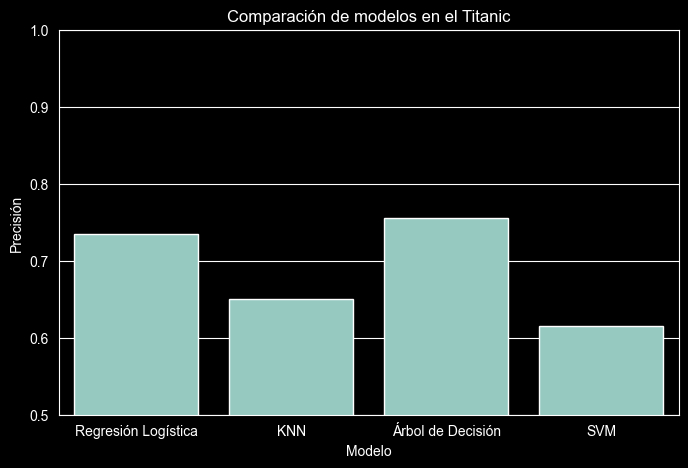

In [9]:
resultados = pd.DataFrame({
    "Modelo": ["Regresión Logística", "KNN", "Árbol de Decisión", "SVM"],
    "Precisión": [acc_log, acc_knn, acc_tree, acc_svm]
})

plt.figure(figsize=(8,5))
sns.barplot(data=resultados, x="Modelo", y="Precisión")
plt.ylim(0.5, 1.0)
plt.title("Comparación de modelos en el Titanic")
plt.show()

### Extra - Widgets interactivos
Implementación de controles interactivos (con ipywidgets) que permiten ajustar hiperparámetros, visualizar diferentes métricas o explorar predicciones en tiempo real, mejorando la experiencia de análisis y demostración.

In [10]:
# Sliders para introducir valores
w_pclass = widgets.IntSlider(value=2, min=1, max=3, description="Clase")
w_sex = widgets.Dropdown(options=[("Hombre", 0), ("Mujer", 1)], description="Sexo")
w_age = widgets.FloatSlider(value=30, min=1, max=80, step=1, description="Edad")
w_fare = widgets.FloatSlider(value=32, min=0, max=300, step=1, description="Tarifa")
w_alone = widgets.Dropdown(options=[("Acompañado", 0), ("Solo", 1)], description="Solo")

output = widgets.Output()

def actualizar_prediccion(change=None):
    with output:
        output.clear_output()

        valores = [
            w_pclass.value,
            w_sex.value,
            w_age.value,
            w_fare.value,
            w_alone.value
        ]

        pred = model_log.predict([valores])[0]
        prob = model_log.predict_proba([valores])[0][pred]

        resultado = "🟢 Sobrevive" if pred == 1 else "🔴 No sobrevive"

        print("Valores introducidos:", valores)
        print("\nResultado del modelo:", resultado)
        print(f"Probabilidad estimada: {prob:.2f}")

# Cuando cambie un slider → recalcular
for widget in [w_pclass, w_sex, w_age, w_fare, w_alone]:
    widget.observe(actualizar_prediccion, names='value')

display(w_pclass, w_sex, w_age, w_fare, w_alone, output)

# Llamada inicial
actualizar_prediccion()


IntSlider(value=2, description='Clase', max=3, min=1)

Dropdown(description='Sexo', options=(('Hombre', 0), ('Mujer', 1)), value=0)

FloatSlider(value=30.0, description='Edad', max=80.0, min=1.0, step=1.0)

FloatSlider(value=32.0, description='Tarifa', max=300.0, step=1.0)

Dropdown(description='Solo', options=(('Acompañado', 0), ('Solo', 1)), value=0)

Output()